In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split,KFold,cross_val_score

In [2]:
data=pd.read_csv("bike_share.csv")
data.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 935.6 KB


In [4]:
data.shape

(10886, 11)

In [5]:
data.duplicated().sum()

21

In [6]:
data=data.drop_duplicates()

In [7]:
data.duplicated().sum()

0

In [8]:
std_scale = StandardScaler()
df_std=std_scale.fit_transform(data)
data_preprocessed = pd.DataFrame(df_std,columns = data.columns)
data=data_preprocessed

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10865.0,1.563521e-14,1.000046,-1.350969,-0.454640,0.441688,1.338017,1.338017
holiday,10865.0,-6.487269e-16,1.000046,-0.171661,-0.171661,-0.171661,-0.171661,5.825435
workingday,10865.0,-3.576420e-18,1.000046,-1.460146,-1.460146,0.684863,0.684863,0.684863
weather,10865.0,1.053246e-15,1.000046,-0.660430,-0.660430,-0.660430,0.916619,4.070717
temp,10865.0,9.928143e-17,1.000046,-2.494791,-0.809775,0.032733,0.769927,2.665570
atemp,10865.0,-1.436587e-15,1.000046,-2.704839,-0.826983,0.067374,0.872591,2.572165
humidity,10865.0,-4.086086e-16,1.000046,-3.215415,-0.772934,0.006581,0.786097,1.981354
windspeed,10865.0,4.970151e-16,1.000046,-1.569278,-0.711581,0.023002,0.512997,5.412949
casual,10865.0,-1.892335e-15,1.000046,-0.722090,-0.642061,-0.381965,0.258271,6.620617
registered,10865.0,4.922483e-16,1.000046,-1.031890,-0.786905,-0.243966,0.444640,4.834504


<AxesSubplot:>

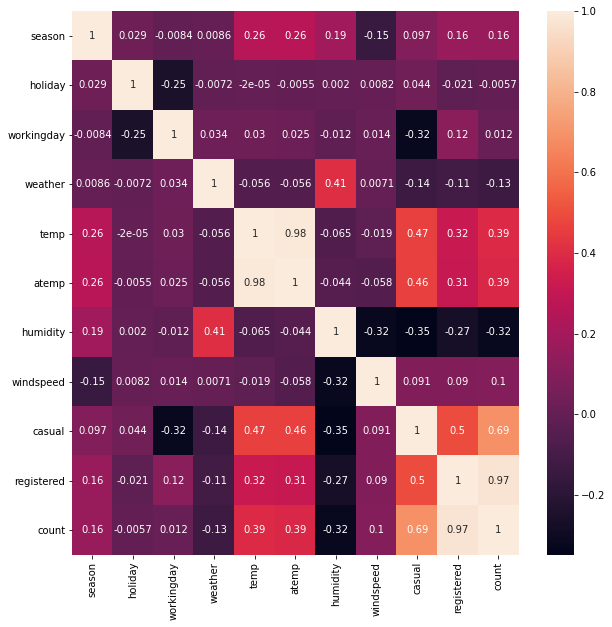

In [10]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:>

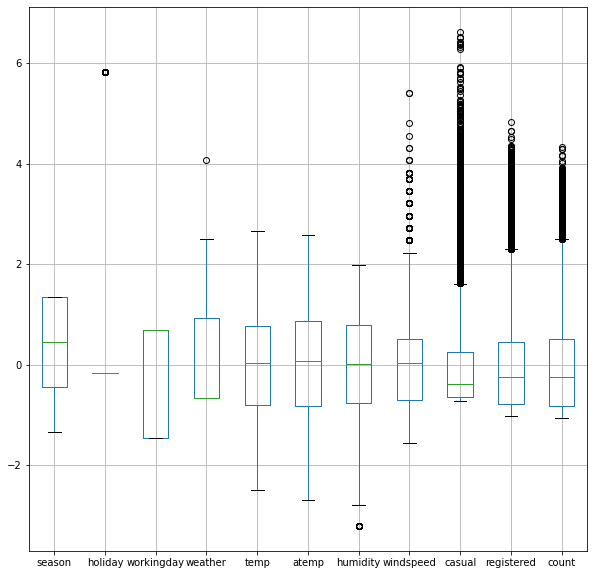

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
data.boxplot()

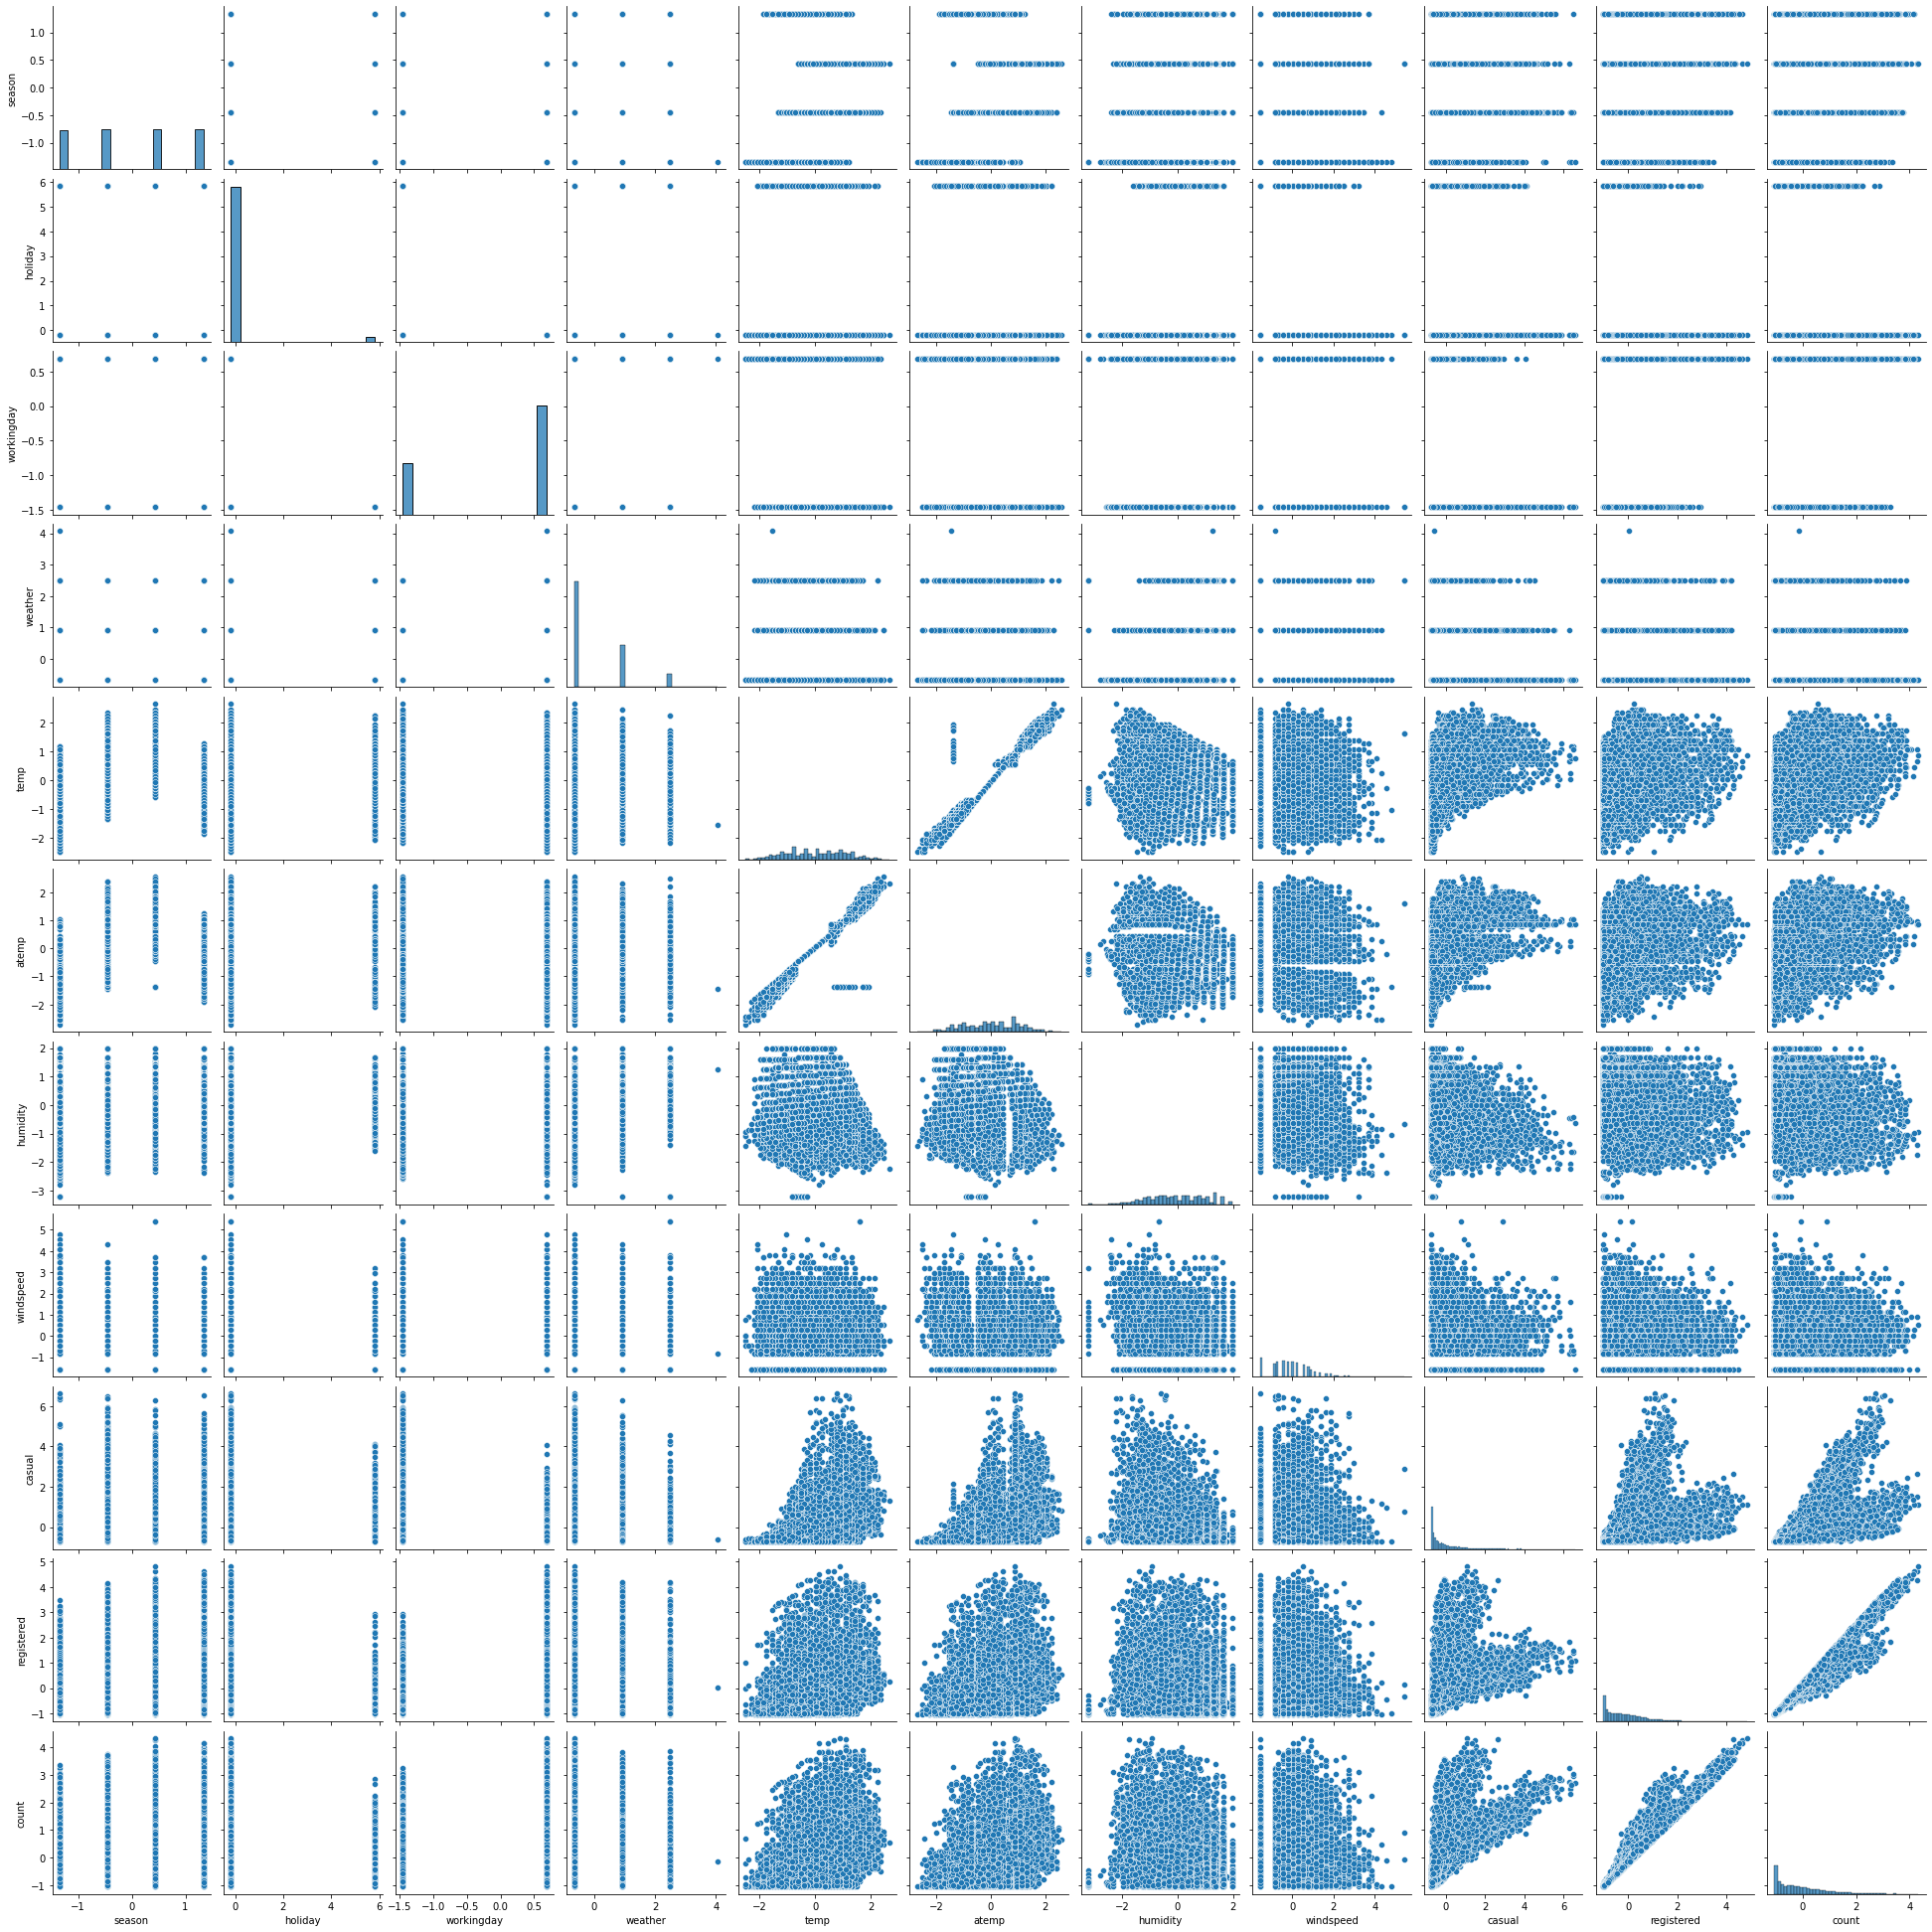

In [12]:
sns.pairplot(data)

In [20]:
X = data.drop(columns={"casual","registered","count"})

In [21]:
y = data["registered"]

In [22]:
model = LinearRegression()

In [25]:
np.mean(np.abs(cross_val_score(model,X,y,scoring="neg_root_mean_squared_error",cv=10)))

0.9021886558042385

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [28]:
model.fit(X_train,y_train)

LinearRegression()

In [29]:
train_pred=model.predict(X_train)

In [30]:
test_pred=model.predict(X_test)

In [31]:
np.sqrt(mean_squared_error(y_train, train_pred))

0.8963600343985882

In [32]:
np.sqrt(mean_squared_error(y_test, test_pred))

0.8988612430855982

In [34]:
r2 = r2_score(y_train, train_pred)
r2

0.1940391098392008

In [35]:
r2 = r2_score(y_test, test_pred)
r2

0.19768118281490787